# Lesson 9 Assignment - Wine Neural Network

## Author - Connor Higgins

## Instructions
For this assignment you will start from the perceptron neural network notebook (Simple Perceptron Neural Network.ipynb) and modify the python code to make it into a multi-layer neural network. To test your system, use the RedWhiteWine.csv file with the goal of building a red or white wine classifier. Use all the features in the dataset, allowing the network to decide how to build the internal weighting system.

In [1]:
# Data Set
URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/RedWhiteWine.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
np.set_printoptions(edgeitems=3)

In [3]:
df = pd.read_csv(URL)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
# Creating features (X) and target (y) arrays.
X = df.drop('Class', axis=1).values
y = df['Class'].values.reshape(-1,1)
print(f'X {X.shape}:\n{X}\n')
print(f'y {y.shape}:\n{y}\n')

X (6497, 12):
[[ 7.4   0.7   0.   ...  0.56  9.4   5.  ]
 [ 7.8   0.88  0.   ...  0.68  9.8   5.  ]
 [ 7.8   0.76  0.04 ...  0.65  9.8   5.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]

y (6497, 1):
[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]



In [5]:
# Standardizing features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for i in range(X.shape[1]):
    X[:,i] = scaler.fit_transform(X[:,i].reshape(-1,1)).reshape(1,-1)
print(f'X:\n{X}\n')

X:
[[0.29752066 0.41333333 0.         ... 0.19101124 0.20289855 0.33333333]
 [0.33057851 0.53333333 0.         ... 0.25842697 0.26086957 0.33333333]
 [0.33057851 0.45333333 0.02409639 ... 0.24157303 0.26086957 0.33333333]
 ...
 [0.2231405  0.10666667 0.11445783 ... 0.13483146 0.20289855 0.5       ]
 [0.14049587 0.14       0.18072289 ... 0.08988764 0.69565217 0.66666667]
 [0.18181818 0.08666667 0.22891566 ... 0.05617978 0.55072464 0.5       ]]



In [6]:
# Splitting Dataset into Train (80%) and Test (20%) portions.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape} | y_train shape: {y_train.shape}")
print(f"X_test shape:  {X_test.shape} | y_test shape: {y_test.shape}")

X_train shape: (5197, 12) | y_train shape: (5197, 1)
X_test shape:  (1300, 12) | y_test shape: (1300, 1)


In [7]:
# Creating classification report function
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def TrainTestClassReport(y_train, y_train_pred, y_test, y_test_pred, label):
    
    '''Returns train and test data confusion matrices and classification report'''
    
    plt.figure(figsize=(12,4))
    plt.suptitle(f'{label}:\nTrain and Test confusion matrices', y=1.1)
    ax0 = plt.subplot(121)
    train_acc_score = accuracy_score(y_train, y_train_pred)
    train_conf_mat = confusion_matrix(y_train, y_train_pred)
    sns.heatmap(train_conf_mat, annot=True, fmt='g', cmap='Blues', ax=ax0)
    plt.xlabel('Predicted')
    plt.ylabel('Actual', rotation=0)
    plt.xticks([0.5,1.5], ['Positive', 'Negative'])
    plt.yticks([0.5,1.5], ['Positive', 'Negative'], rotation=0)
    plt.title(f'Training data confusion matrix for \n with overall accuracy: {train_acc_score*100:.3f}%',
              fontsize=10)
    ax1 = plt.subplot(122)
    test_acc_score = accuracy_score(y_test, y_test_pred)
    test_conf_mat = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(test_conf_mat, annot=True, fmt='g', cmap='Blues', ax=ax1)
    plt.xlabel('Predicted')
    plt.yticks([0.5,1.5], ['', ''], rotation=0)
    plt.xticks([0.5,1.5], ['Positive', 'Negative'])
    plt.title(f'Test data confusion matrix \n with overall accuracy: {test_acc_score*100:.3f}%',
             fontsize=10)
    plt.subplots_adjust(hspace = 0, wspace = 0)
    plt.show()
    
    d0 = classification_report(y_train, y_train_pred, digits=5, output_dict=True)
    d1 = classification_report(y_test, y_test_pred, digits=5, output_dict=True)
    df = pd.concat([pd.DataFrame(d0).T, pd.DataFrame(d1).T], axis=1)
    df.columns = [
        'train ' + df.columns[i]  
         if i < 4 else 'test ' + df.columns[i] 
         for i in range(len(df.columns))
    ]
    print('Train and Test Data Classification Report')
    return df 

### Initial 3 Layer Neural Network - Based on Simple Perceptron Neural Network

In [8]:
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

def sigmoid_output_to_derivative(output):
    return output*(1-output)

def Train3LayerNeuralNetwork(X, y, n_epochs, h1_width, alpha, random_state=None):
    
    '''Trains 3 layer neural network for n epochs'''

    if random_state:
        np.random.seed(random_state)

    n_entries, n_inputs = X.shape
    _, n_outputs = y.shape

    # Randomly initialize our weights with mean 0
    W1 = 2 * np.random.random([n_inputs, h1_width]) - 1
    B1 = 2 * np.random.random([1, h1_width]) - 1
    W2 = 2 * np.random.random([h1_width, n_outputs]) - 1
    B2 = 2 * np.random.random([1, n_outputs]) - 1

    for i in range(n_epochs+1):

        # Feed forward X to A1 to A2
        Z1 = np.dot(X, W1) + B1
        A1 = sigmoid(Z1)
        Z2 = np.dot(A1, W2) + B2
        A2 = sigmoid(Z2)

        # Cost
        Cost = -1/n_inputs * np.sum(y*np.log(A2)+(1-y)*np.log(1-A2))

        # Back propagate y to A2 to A1
        layer_2_error = A2 - y
        layer_2_delta = layer_2_error * sigmoid_output_to_derivative(A2)
        dW2 = 1/n_inputs * np.dot(A1.T, layer_2_delta)
        dB2 = 1/n_inputs * np.sum(layer_2_error, axis=0, keepdims=True)

        layer_1_error = np.dot(layer_2_delta, W2.T)
        layer_1_delta = layer_1_error * sigmoid_output_to_derivative(A1)
        dW1 = 1/n_inputs * np.dot(X.T, layer_1_delta)
        dB1 = 1/n_inputs * np.sum(layer_1_error, axis=0, keepdims=True)

        W2 -= alpha * dW2
        B2 -= alpha * dB2
        W1 -= alpha * dW1
        B1 -= alpha * dB1

        y_pred = np.round(A2).astype(int)

        if i % 10000 == 0:
            print(f'Iteration {i}')
            print(f'Cost: {Cost}')
            print(f'y_pred:   {y_pred.T[0]}')
            print(f'y_actual: {y.T[0]}\n')

    return W1, B1, W2, B2, y_pred

def Test3LayerNeuralNetwork(X, y, W1, B1, W2, B2):
    
    '''Tests 3 layer neural network'''
    
    Z1 = np.dot(X, W1) + B1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + B2
    A2 = sigmoid(Z2)
    y_pred = np.round(A2).astype(int)
    return y_pred

In [9]:
# Running 3 layer neural network with alpha 0.001
np.set_printoptions(edgeitems=16)
start = datetime.now()
W1, B1, W2, B2, y_train_pred = Train3LayerNeuralNetwork(X_train, y_train, 100000, 24, 0.001, 3)
end = datetime.now()
time = end - start
print(f'Elapsed time: {time.seconds} seconds')

Iteration 0
Cost: 246.1793899636608
y_pred:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_actual: [0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]

Iteration 10000
Cost: 231.7390787770064
y_pred:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_actual: [0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]

Iteration 20000
Cost: 223.19724233015646
y_pred:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_actual: [0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]

Iteration 30000
Cost: 224.48949430197007
y_pred:   [0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
y_actual: [0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]

Iteration 40000
Cost: 82.81983069520574
y_pred:   [0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
y_actual: [0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1

In [10]:
# Displaying prediction for test data
y_test_pred = Test3LayerNeuralNetwork(X_test, y_test, W1, B1, W2, B2)
print(f'Y_pred:   {y_test_pred.T[0]}')
print(f'Y_actual: {y_test.T[0]}\n')

Y_pred:   [0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 ... 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0]
Y_actual: [0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 ... 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0]



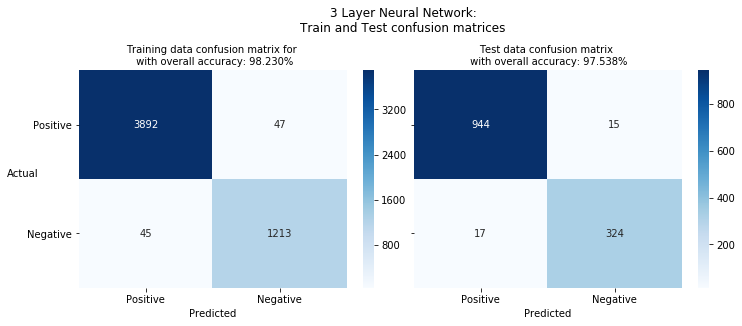

Train and Test Data Classification Report


,train f1-score,train precision,train recall,train support,test f1-score,test precision,test recall,test support
0,0.988319,0.988570,0.988068,3939.0,0.983333,0.982310,0.984359,959.0
1,0.963463,0.962698,0.964229,1258.0,0.952941,0.955752,0.950147,341.0
micro avg,0.982297,0.982297,0.982297,5197.0,0.975385,0.975385,0.975385,1300.0
macro avg,0.975891,0.975634,0.976148,5197.0,0.968137,0.969031,0.967253,1300.0
weighted avg,0.982302,0.982307,0.982297,5197.0,0.975361,0.975344,0.975385,1300.0


In [11]:
# Displaying network results
TrainTestClassReport(y_train, y_train_pred, y_test, y_test_pred, '3 Layer Neural Network')

#### Figure 1. Classification Report for Initial 3 Layer Neural Network
Following the design of the simple perceptron neural network in L08, a 3 layer neural network was created as an initial red or white wine classification model. After some initial testing, a hidden layer width of 24, an alpha or learning rate of 0.001, and a random state of 3 were used as hyperparameters when training the model against the training data for 100,000 epochs. Overall, the model achieved an accuracy score of 98.23% on the training data, translating to robust performance on the test data with an accuracy score of 97.54%, misclassifying only 32 out of 1300 wines.

###  Multi-Layer Neural Network with Momentum

In [12]:
class MultiLayerNeuralNetwork:

    '''
    Instantiates a neural network of n-layers with n-widths
    Based on BackPropagationNetwork created by Ryan Harris.
    
    Source: 
    https://github.com/TheFellow/Neural-Network-Tutorial-Python/blob/master/NeuralNetwork.py
    '''

    def __init__(self, layer_size, random_state=None):

        '''Initialize the network'''
        
        self.n_layers = 0
        self.shape = None
        self.weights = []

        if random_state:
            np.random.seed(random_state)

        # Layer info
        self.n_layers = len(layer_size) - 1
        self.shape = layer_size

        # Data from last run
        self.layer_inputs = []
        self.layer_outputs = []
        self.previous_weight_deltas = []

        # Creating weight arrays:
        # size of proceeding layer x size of preceeding layer plus 1 for bias node
        for (l1,l2) in zip(layer_size[:-1], layer_size[1:]):
            self.weights.append(2*np.random.random(size=(l2,l1+1))-1)
            self.previous_weight_deltas.append(np.zeros((l2,l1+1)))

    def FeedForward(self, X):

        '''Feed forward neural network for single epoch'''

        n_entries = X.shape[0]

        # Clearing previous values
        self.layer_inputs = []
        self.layer_outputs = []

        # Feed forward
        for layer in range(self.n_layers):

            # Obtaining layer input
            bias_nodes = np.ones([1, n_entries])
            if layer == 0:
                # Dot product of first layer weights and X + bias
                layer_input = self.weights[0].dot(
                            np.vstack([X.T, bias_nodes]))
            else:
                # Dot product of current layer weights and previous layer output + bias
                layer_input = self.weights[layer].dot(
                            np.vstack([self.layer_outputs[-1], bias_nodes]))
            self.layer_inputs.append(layer_input)

            # Obtaining layer output
            self.layer_outputs.append(self.Sigmoid(layer_input))

        return self.layer_outputs[-1].T

    def FeedForwardBackPropagate(self, X, y, alpha, momentum):

        '''Feed forward and back propagate neural network for single epoch'''

        deltas = []
        n_entries = X.shape[0]

        ## Feed forwarding network
        self.FeedForward(X)

        ## Back propagating network
        # Obtaining layer deltas
        for layer in reversed(range(self.n_layers)):
            if layer == self.n_layers - 1:
                # Comparing to target values
                y_pred = self.layer_outputs[layer]
                delta = y_pred - y.T
                error = np.sum(delta**2)
                deltas.append(delta * self.Sigmoid(y_pred, True))
            else:
                # Comparing to proceeding layer's delta using that layer's weights
                delta = self.weights[layer+1].T.dot(deltas[-1])
                deltas.append(delta[:-1, :] # Removing bias delta
                              * self.Sigmoid(self.layer_inputs[layer], True))

        # Obtaining weight deltas
        for layer in range(self.n_layers):
            d_index = self.n_layers - 1 - layer # Retrieving deltas in layer order

            # Retrieving layer_output
            if layer == 0:
                layer_output = np.vstack([X.T,
                                          np.ones([1, n_entries])])
            else:
                layer_output = np.vstack([self.layer_outputs[layer-1],
                                          np.ones([1, self.layer_outputs[layer-1].shape[1]])])

            # Reorganizing layer_output into 3D matrix:
            # separating entries using 3rd dimension and listing values row-wise
            trans_layer_output = layer_output[None, :, :].transpose(2, 0, 1)

            # Reorganizing deltas into 3D matrix:
            # separating entries using 3rd dimension and listing values column-wise
            trans_deltas = deltas[d_index][None, :, :].transpose(2, 1, 0)

            # Mutiplying transformed matrices and adding along depth axis
            current_weight_delta = np.sum(trans_layer_output * trans_deltas, axis=0)

            # Calculating weight delta using alpha, momentum, and the previous epoch weight delta
            weight_delta = alpha * current_weight_delta \
                         + momentum * self.previous_weight_deltas[layer]

            # Updating weights based on weight_delta
            self.weights[layer] -= weight_delta

            # Updating previous weight delta for next epoch
            self.previous_weight_deltas[layer] = weight_delta

        return error, np.round(y_pred).astype(int)
    
    def Sigmoid(self, x, deriv=False):
        if deriv:
            output = self.Sigmoid(x)
            return output*(1-output)
        else:
            return 1 / (1 + np.exp(-x))

In [13]:
def NeuralNetPlot(ax, layer_sizes, title):
    
    '''
    Draws a neural network with given layer_sizes
    Based on draw_neural_net.py by Colin Raffel.
    
    Source:
    https://gist.github.com/craffel/2d727968c3aaebd10359
    '''
    
    n_layers = len(layer_sizes)
    v_spacing = 0.8/float(max(layer_sizes))
    h_spacing = 0.8/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + 0.5
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + 0.1, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Synapses
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + 0.5
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + 0.5
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + 0.1, (n + 1)*h_spacing + 0.1],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
    plt.axis('off')
    plt.title(title, fontsize=16, y=0.9)
    return plt.show()

In [14]:
# Running 3 layer neural network with alpha 0.01 and momentum 0.3
nn0 = MultiLayerNeuralNetwork((12,24,1), 2)
n_epochs = 1000000
min_error = 10
start = datetime.now()
for i in range(n_epochs+1):
    error, y_pred = nn0.FeedForwardBackPropagate(X_train, y_train, 0.01, 0.3)
    if i % 1000 == 0:
        print(f"Iteration {i}\t Error: {error:0.6f}")
        print(f"y predicted: {y_pred}")
        print(f"y actual:    {y_train.T}\n")
    if error <= min_error:
        print(f"Minimum error reached at iteration {i}")
        print(f"Error: {error:0.6f}")
        break
end = datetime.now()
time = end - start
print(f'Elapsed time: {time.seconds} seconds')

Iteration 0	 Error: 1169.485057
y predicted: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
y actual:    [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]

Iteration 1000	 Error: 32.358228
y predicted: [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]
y actual:    [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]

Iteration 2000	 Error: 28.617900
y predicted: [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]
y actual:    [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]

Iteration 3000	 Error: 24.947841
y predicted: [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]
y actual:    [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]

Iteration 4000	 Error: 19.333085
y predicted: [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]
y actual:    [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 

In [15]:
# Displaying final prediction for training data
y_train_pred = nn0.FeedForward(X_train)
y_train_pred = np.round(y_train_pred).astype(int)
print(f"y predicted (final): {y_train_pred.T}")
print(f"y actual:            {y_train.T}")

y predicted (final): [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]
y actual:            [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]


In [16]:
# Displaying prediction for testing data
y_test_pred = nn0.FeedForward(X_test)
y_test_pred = np.round(y_test_pred).astype(int)
print(f"y predicted (final): {y_test_pred.T}")
print(f"y actual:            {y_test.T}")

y predicted (final): [[0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 ... 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0]]
y actual:            [[0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 ... 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0]]


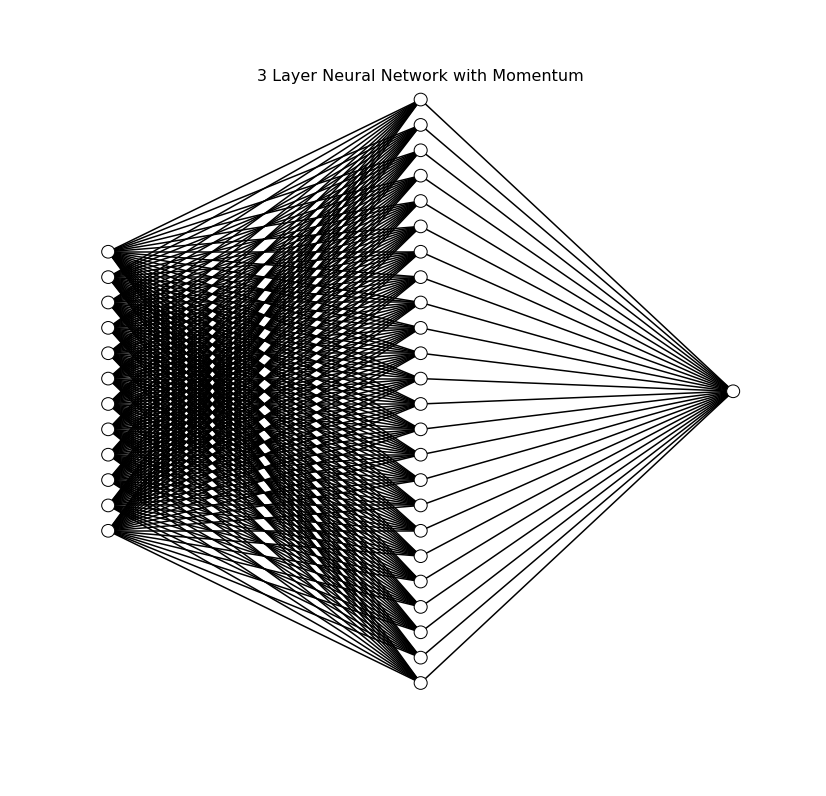

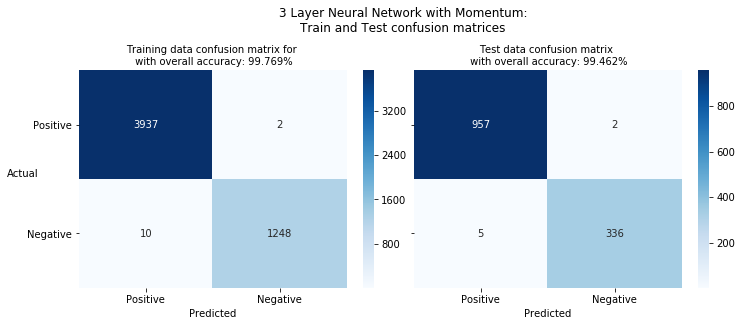

Train and Test Data Classification Report


,train f1-score,train precision,train recall,train support,test f1-score,test precision,test recall,test support
0,0.998478,0.997466,0.999492,3939.0,0.996356,0.994802,0.997914,959.0
1,0.995215,0.998400,0.992051,1258.0,0.989691,0.994083,0.985337,341.0
micro avg,0.997691,0.997691,0.997691,5197.0,0.994615,0.994615,0.994615,1300.0
macro avg,0.996847,0.997933,0.995772,5197.0,0.993023,0.994443,0.991626,1300.0
weighted avg,0.997688,0.997692,0.997691,5197.0,0.994608,0.994614,0.994615,1300.0


In [17]:
# Displaying network results
fig = plt.figure(figsize=(14, 14))
NeuralNetPlot(fig.gca(), nn0.shape, '3 Layer Neural Network with Momentum')
TrainTestClassReport(y_train, y_train_pred, y_test, y_test_pred, '3 Layer Neural Network with Momentum')

#### Figure 2. Classification Report for 3 Layer Neural Network with Momentum
Given the limitations of the initial 3 layer neural network, such as an inability to increase the number of hidden layers, retain certain parameters, or apply momentum during training, a multilayer neural network class was created based on the [BackPropagationNetwork](https://github.com/TheFellow/Neural-Network-Tutorial-Python/blob/master/NeuralNetwork.py) class created by Ryan Harris. This new method allows for changing the number of hidden layers as well as the momentum hyperparameter per each instantiation. 

To test the effect of incorporating momentum into our model, a 3 layer neural network was created with similar hyperparameters to our initial model: a hidden layer width of 24 and an alpha of 0.001; however, a random state of 2 and a momentum of 0.3 were also used. Additionally, the model was trained until it achieved an error less than 10 on the training data, rather than for 100,000 epochs. Overall, this model was noticeably more accurate than the intial model, with an accuracy score of 99.77% (v. 98.23%) on the training data  and an accuracy score of 99.46% (v. 97.54%) on the test data, only misclassifying 7 out of 1300 wines.

In [18]:
# Running 4 layer neural network with alpha 0.001 and momentum 0.3
nn1 = MultiLayerNeuralNetwork((12,12,24,1), 2)
n_epochs = 1000000
min_error = 10
start = datetime.now()
for i in range(n_epochs+1):
    error, y_pred = nn1.FeedForwardBackPropagate(X_train, y_train, 0.001, 0.3)
    if i % 1000 == 0:
        print(f"Iteration {i}\t Error: {error:0.6f}")
        print(f"y predicted: {y_pred}")
        print(f"y actual:    {y_train.T}\n")
    if error <= min_error:
        print(f"Minimum error reached at iteration {i}")
        print(f"Error: {error:0.6f}")
        break
end = datetime.now()
time = end - start
print(f'Elapsed time: {time.seconds} seconds')

Iteration 0	 Error: 2095.278943
y predicted: [[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
y actual:    [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]

Iteration 1000	 Error: 38.717848
y predicted: [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]
y actual:    [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]

Iteration 2000	 Error: 34.314460
y predicted: [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]
y actual:    [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]

Iteration 3000	 Error: 31.589698
y predicted: [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]
y actual:    [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]

Iteration 4000	 Error: 29.332473
y predicted: [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]
y actual:    [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 

In [19]:
# Displaying final prediction for training data
y_train_pred = nn1.FeedForward(X_train)
y_train_pred = np.round(y_train_pred).astype(int)
print(f"y predicted (final): {y_train_pred.T}")
print(f"y actual:            {y_train.T}")

y predicted (final): [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]
y actual:            [[0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 ... 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]


In [20]:
# Displaying prediction for testing data
y_test_pred = nn1.FeedForward(X_test)
y_test_pred = np.round(y_test_pred).astype(int)
print(f"y predicted (final): {y_test_pred.T}")
print(f"y actual:            {y_test.T}")

y predicted (final): [[0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 ... 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0]]
y actual:            [[0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 ... 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0]]


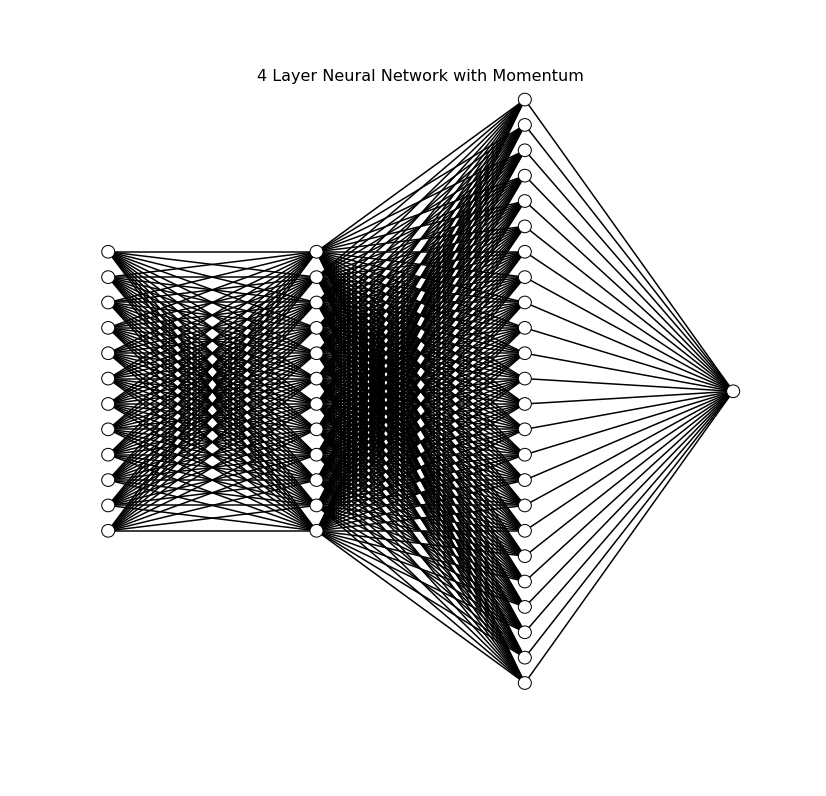

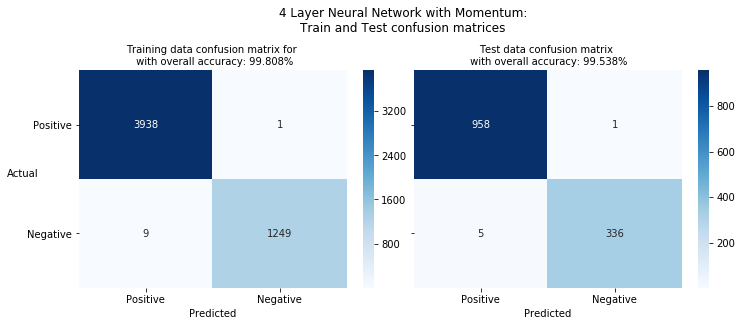

Train and Test Data Classification Report


,train f1-score,train precision,train recall,train support,test f1-score,test precision,test recall,test support
0,0.998732,0.997720,0.999746,3939.0,0.996878,0.994808,0.998957,959.0
1,0.996013,0.999200,0.992846,1258.0,0.991150,0.997033,0.985337,341.0
micro avg,0.998076,0.998076,0.998076,5197.0,0.995385,0.995385,0.995385,1300.0
macro avg,0.997372,0.998460,0.996296,5197.0,0.994014,0.995920,0.992147,1300.0
weighted avg,0.998074,0.998078,0.998076,5197.0,0.995376,0.995391,0.995385,1300.0


In [21]:
# Displaying network results
fig = plt.figure(figsize=(14, 14))
NeuralNetPlot(fig.gca(), nn1.shape, '4 Layer Neural Network with Momentum')
TrainTestClassReport(y_train, y_train_pred, y_test, y_test_pred, '4 Layer Neural Network with Momentum')

#### Figure 3. Classification Report for 4 Layer Neural Network with Momentum
To test the performance effect of incorporating an additional hidden layer, a 4 layer neural network was created from the same class as the final 3 layer neural network. Similar to the 3 layer network, a momentum of 0.3, hidden layer width of 24 (for the 2nd hidden layer), and a random state of 2 were used; however, a 1st hidden layer width of 12 and an alpha of 0.001 were new additions. With a reduced learning rate by a factor of 10 as well as an additional hidden layer, this final model took more than twice as long to converge to an error of less than 10. However, the result was a modest increase in performance, with a training data accuracy score of 99.81% (v. 99.77%) and test data accuracy score of 99.54% (v. 99.46%), only misclassifying 6 out of 1300 wines.